# **Importing necessary libraries.**

---



In [1]:
import numpy as np
import pandas as pd

# Loading datasets using pandas

In [2]:
df_movies = pd.read_csv('/content/movies.csv')
df_links = pd.read_csv('/content/links.csv')
df_rate = pd.read_csv('/content/ratings.csv')
df_tags = pd.read_csv('/content/tags.csv')

# What is the shape of "movies.csv"?

In [4]:
df_movies.shape

(9742, 3)

# What is the shape of "ratings.csv"?

In [5]:
df_rate.shape

(100836, 4)

# How many unique "userId" are available in "ratings.csv"?


In [7]:
n = len(pd.unique(df_rate['userId']))

In [8]:
n

610

In [9]:
df_rate.userId.nunique()

610

In [10]:
df_rate['rating'].value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

# Which movie has recieved maximum number of user ratings?


In [13]:
movie_ratings_count = df_rate.groupby('movieId')['userId'].count()
most_rated_movie_id = movie_ratings_count.idxmax()
print(f'{most_rated_movie_id=}')

most_rated_movie_id=356


# Select all the correct tags submitted by users to "Matrix, The (1999)" movie

In [17]:
matrix_id = df_movies[df_movies['title'] == 'Matrix, The (1999)']['movieId'].iloc[0]

matrix_tags = df_tags[df_tags['movieId'] == matrix_id]['tag']


print(f'{matrix_tags=}')

matrix_tags=815           martial arts
816                 sci-fi
1646    alternate universe
2794            philosophy
2795      post apocalyptic
Name: tag, dtype: object


# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)

In [18]:
movie_id = df_movies.loc[df_movies['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].iloc[0]
avg_rating = df_rate.loc[df_rate['movieId'] == movie_id, 'rating'].mean()
print(f'{avg_rating=}')

avg_rating=3.970982142857143


# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like

<Axes: >

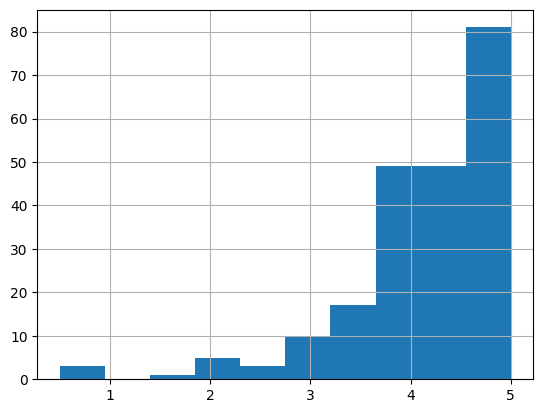

In [19]:
fight_club_ratings = df_rate[df_rate['movieId'] == df_movies[df_movies['title'] == 'Fight Club (1999)']['movieId'].iloc[0]]['rating']
fight_club_ratings.hist()

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50)

In [20]:
rating_stats = df_rate.groupby('movieId')['rating'].agg(['count', 'mean'])
print(f'{rating_stats=}')

rating_stats=         count      mean
movieId                 
1          215  3.920930
2          110  3.431818
3           52  3.259615
4            7  2.357143
5           49  3.071429
...        ...       ...
193581       1  4.000000
193583       1  3.500000
193585       1  3.500000
193587       1  3.500000
193609       1  4.000000

[9724 rows x 2 columns]


In [21]:
rating_stats = rating_stats.rename(columns={'count': 'rating_count'})
movie_stats = df_movies.join(rating_stats, on='movieId', how='inner')
print(f'{movie_stats=}')

movie_stats=      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  rating_count      mean  
0     Adventure|Animation|Children|Comedy|Fantasy           215  3.920930  
1                      Adventure|Children|Fantasy           110  3.431818  
2                                  Come

In [22]:
filtered_movies = movie_stats[movie_stats['rating_count'] > 50]
print(f'{filtered_movies=}')

filtered_movies=      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8305   106782   Wolf of Wall Street, The (2013)   
8372   109374  Grand Budapest Hotel, The (2014)   
8376   109487               Interstellar (2014)   
8475   112852    Guardians of the Galaxy (2014)   
8691   122904                   Deadpool (2016)   

                                           genres  rating_count      mean  
0     Adventure|Animation|Children|Comedy|Fantasy           215  3.920930  
1                      Adventure|Children|Fantasy           110  3.431818  
2                                  Comedy|Romance            52  3.259615  
5                           Action|Crime|Thriller           102  3.

# Which movie is the most popular based on  average user ratings

In [23]:
popular_movie = movie_stats[movie_stats['rating_count'] > 50].sort_values('mean', ascending=False).iloc[0]['title']
print(f'{popular_movie=}')

popular_movie='Shawshank Redemption, The (1994)'


# Select all the correct options which comes under top 5 popular movies based on number of user ratings

In [24]:
top_5_movies = movie_stats.sort_values('rating_count', ascending=False).head(5)['title'].tolist()
print(f'{top_5_movies=}')

top_5_movies=['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)', 'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)']


# Which Sci-Fi movie is "third most popular" based on the number of user ratings

In [25]:
scifi_movies = movie_stats[movie_stats['genres'].str.contains('Sci-Fi')]
third_popular = scifi_movies.sort_values('rating_count', ascending=False).iloc[2]['title']
print(f'{third_popular=}')

third_popular='Jurassic Park (1993)'


# Mention the movieId of the movie which has the highest IMDB rating

In [26]:
highest_rated_movie_id = movie_stats.loc[movie_stats['mean'].idxmax(), 'movieId']
print(f'{highest_rated_movie_id=}')

highest_rated_movie_id=53


# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating

In [27]:
highest_rated_scifi_movie_id = scifi_movies.loc[scifi_movies['mean'].idxmax(), 'movieId']
print(f'{highest_rated_scifi_movie_id=}')

highest_rated_scifi_movie_id=3687
